In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

df = pd.read_csv("movie_metadata.csv")

**Q1**

In [3]:
df = df.dropna(subset=['duration'])

Text(0, 0.5, 'Number of Movies')

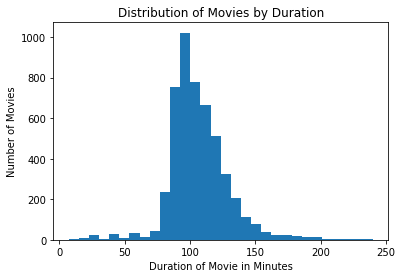

In [4]:
plt.hist(df[df['duration'] <= 240]['duration'], bins=30)
plt.title('Distribution of Movies by Duration')
plt.xlabel('Duration of Movie in Minutes')
plt.ylabel('Number of Movies')

**Q2**

In [5]:
df = df.dropna(subset=['content_rating', 'num_critic_for_reviews'])

[Text(0, 0, 'G'), Text(0, 0, 'PG'), Text(0, 0, 'PG-13'), Text(0, 0, 'R')]

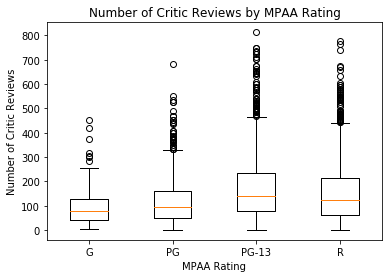

In [12]:
fig, ax = plt.subplots()
ax.boxplot([df[df['content_rating']=='G']['num_critic_for_reviews'],
           df[df['content_rating']=='PG']['num_critic_for_reviews'],
           df[df['content_rating']=='PG-13']['num_critic_for_reviews'],
           df[df['content_rating']=='R']['num_critic_for_reviews']])
ax.set_title('Number of Critic Reviews by MPAA Rating')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Number of Critic Reviews')
ax.set_xticklabels(['G', 'PG', 'PG-13', 'R'])

All movies have quite a few outliers in the number of critic reviews they receive, which makes sense because few movies are exceptionally well known and popular but the ones that are would have much more reviews than is typical. In general, the all the boxplots are skewed to the right further reflecting the fact that movies that do well are rarer but ones that do can have several orders of magnitude more reviews than the median. PG-13 movies seem to have the most number of outliers, although R-rated movies have a lot too. It also looks like PG-13 and R-rated movies get more reviews generally since they have a higher median. These movies also have more variation in the number of reviews they receive, as they have a wider IQR and range than G and PG movies.

__Q3__

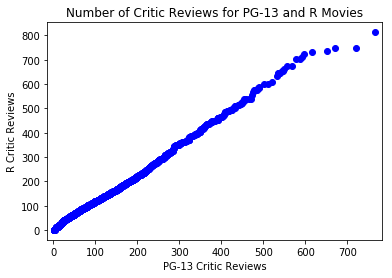

In [22]:
df = df.dropna(subset=['content_rating', 'num_critic_for_reviews'])

x = df[df['content_rating']=='PG-13']['num_critic_for_reviews']
y = df[df['content_rating']=='R']['num_critic_for_reviews']
p = sm.ProbPlot(x)
r = sm.ProbPlot(y)
qqplot_2samples(p, r, xlabel='PG-13 Critic Reviews', ylabel='R Critic Reviews')
plt.title('Number of Critic Reviews for PG-13 and R Movies')
plt.show()

This QQ plot comparing the number of critic reviews for PG-13 and R rated movies shows that these sets of data most likely come from the same distribution. Since a QQ plot is somewhat subjective we can't make any definitive claims; however, the quantiles here form a straight line, except for a little noise at the end, so we can conclude that they most likely come from the same distribution. 

__Q4__

Text(0, 0.5, 'User Reviews')

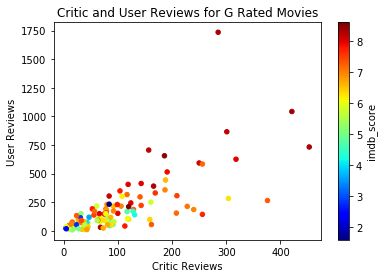

In [5]:
df = df.dropna(subset=['num_user_for_reviews', 'num_critic_for_reviews'])
df = df[df['content_rating']=='G']
fig, ax = plt.subplots()
ax = df.plot.scatter('num_critic_for_reviews', 'num_user_for_reviews', c='imdb_score', colormap='jet', title='Critic and User Reviews for G Rated Movies', ax=ax)
ax.set_xlabel('Critic Reviews')
ax.set_ylabel('User Reviews')

This scatter plot shows a general linear trend of the data, showing that movies with a larger number of critic reviews have a larger number of user reviews as well. The maximum number of user reviews for one movie is much higher than the maximum number of critic reviews; however, this makes sense as many more general users see movies than critics. We can also see that movies with more reviews of either type have a higher imdb score. 